In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from holoviews.plotting.bokeh.styles import font_size
import numpy as np
from bankruptcy_prediction.dataset_methods import extract_significant_correlations, remove_outliers
from bankruptcy_prediction.dataset_methods import load_data

In [85]:
path = '../data/raw/dataset.csv'
df = load_data(path)
len_before = len(df)
df_cleaned = df.dropna()
len_after = len(df_cleaned)
print(f"Rows before cleaning: {len_before}")
print(f"Rows after cleaning: {len_after}")
df_cleaned.info()



Rows before cleaning: 6819
Rows after cleaning: 6819
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                          

In [86]:
labels = ["Bankrupt"] + [f"X{i}" for i in range(1, 96)]
df_cleaned.columns = labels
df_cleaned.describe()


,Bankrupt,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [87]:
tolerance = 0.1
numeric_columns = df_cleaned.select_dtypes(include=['number'])
difference = numeric_columns.max() - numeric_columns.min()
close_min_max = difference[difference <= tolerance]
print("Columns where max is close to min:", close_min_max.index.tolist())

Columns where max is close to min: ['X94']


In [88]:
# Liczba zer w każdej kolumnie
num_zeros_per_column = (df_cleaned == 0).sum()
sorted_num_zeros = num_zeros_per_column.sort_values(ascending=False)
filtered_zeros = sorted_num_zeros[sorted_num_zeros > 10]
top_zeros = sorted_num_zeros.head(10)

print("Columns with more than 10 zeros:")
print(filtered_zeros)

print("\nTop 10 columns with the most zeros:")
print(top_zeros)


Columns with more than 10 zeros:
X85         6811
Bankrupt    6599
X67         2569
X15         2568
X12         1424
X14          891
X63          227
dtype: int64

Top 10 columns with the most zeros:
X85         6811
Bankrupt    6599
X67         2569
X15         2568
X12         1424
X14          891
X63          227
X45            8
X49            8
X46            7
dtype: int64


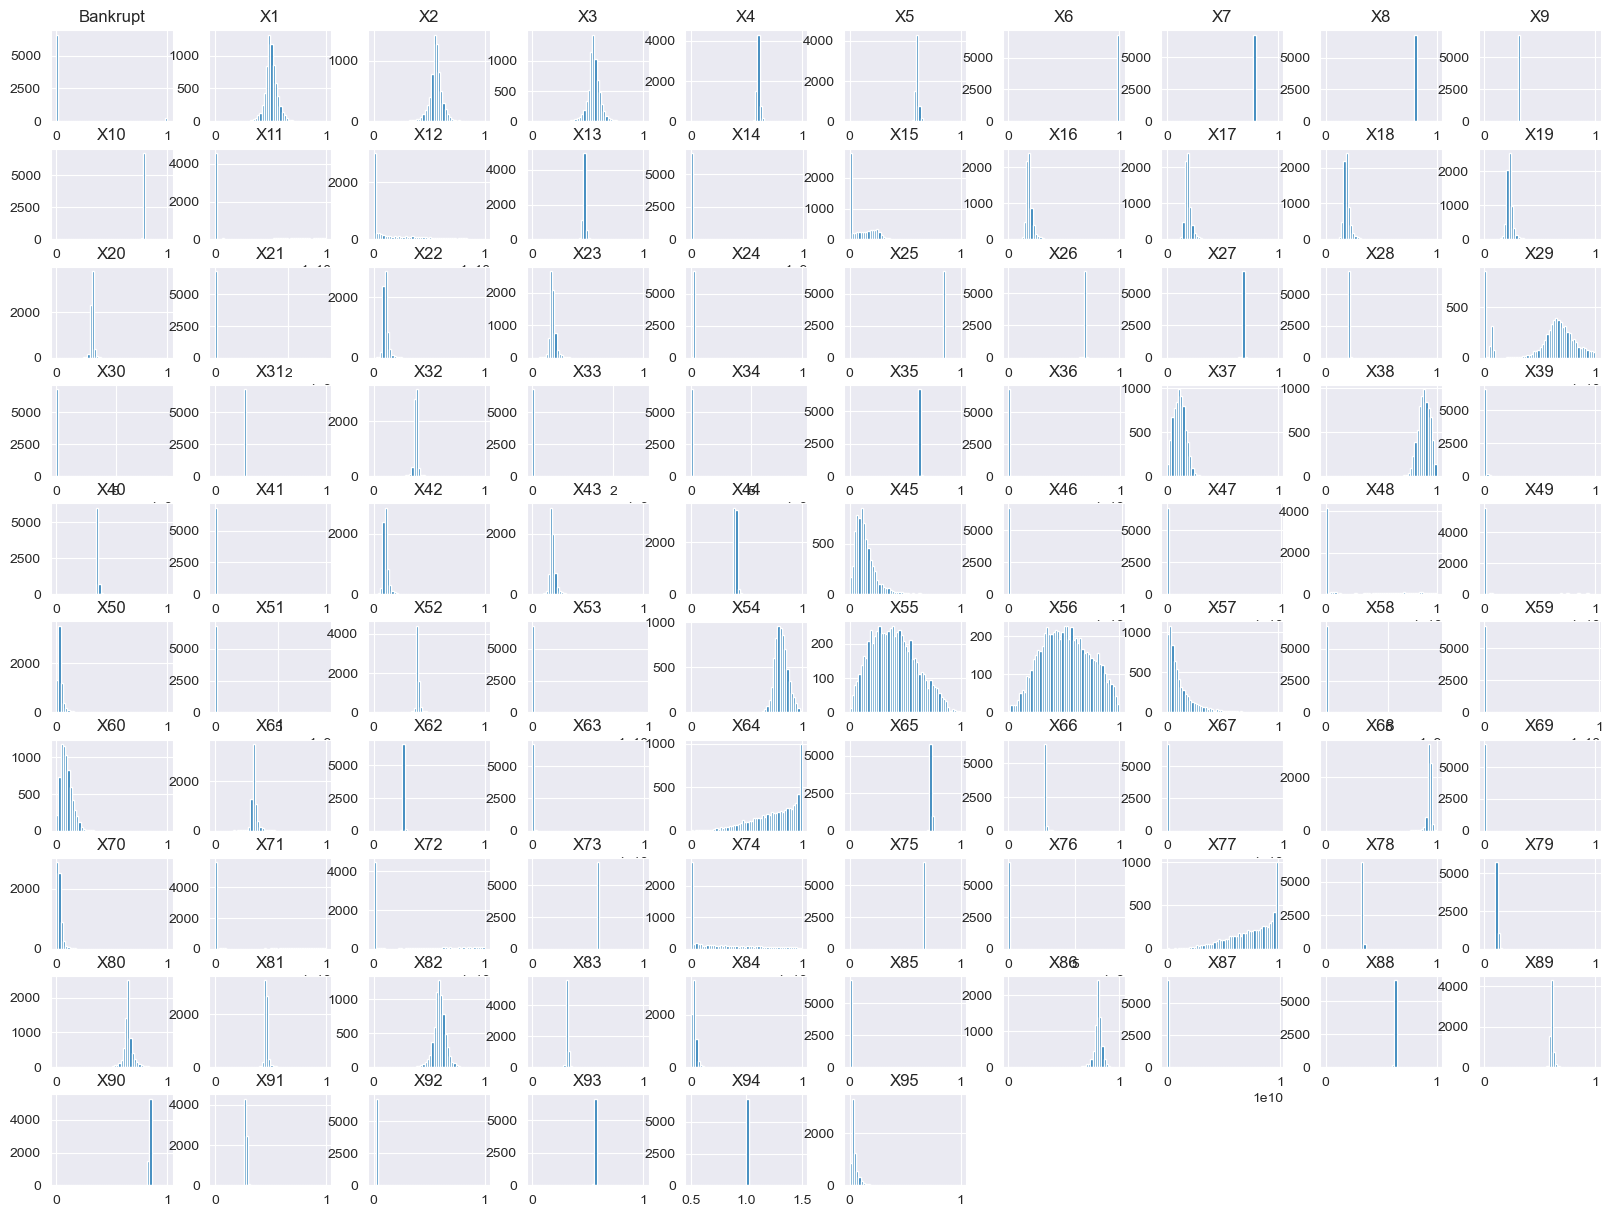

In [89]:
df_cleaned.hist(bins=50, figsize=(20, 15))
plt.show()


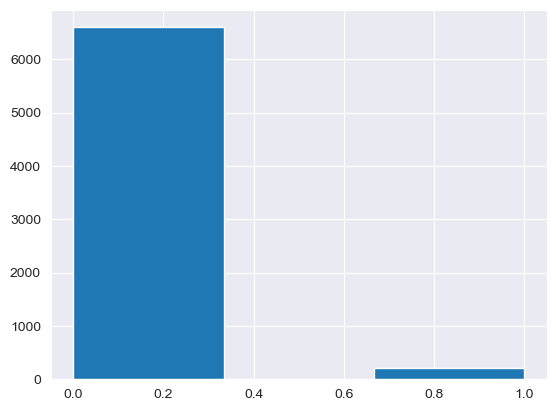

In [90]:
df_cleaned['Bankrupt'].hist(bins=3)
plt.show()

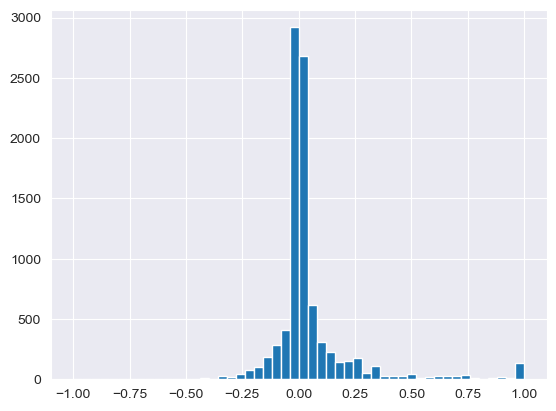

In [91]:
corr_matrix = df_cleaned.corr()
corr_matrix_1d = corr_matrix.to_numpy().reshape(-1)
plt.hist(corr_matrix_1d, bins=50)
plt.show()

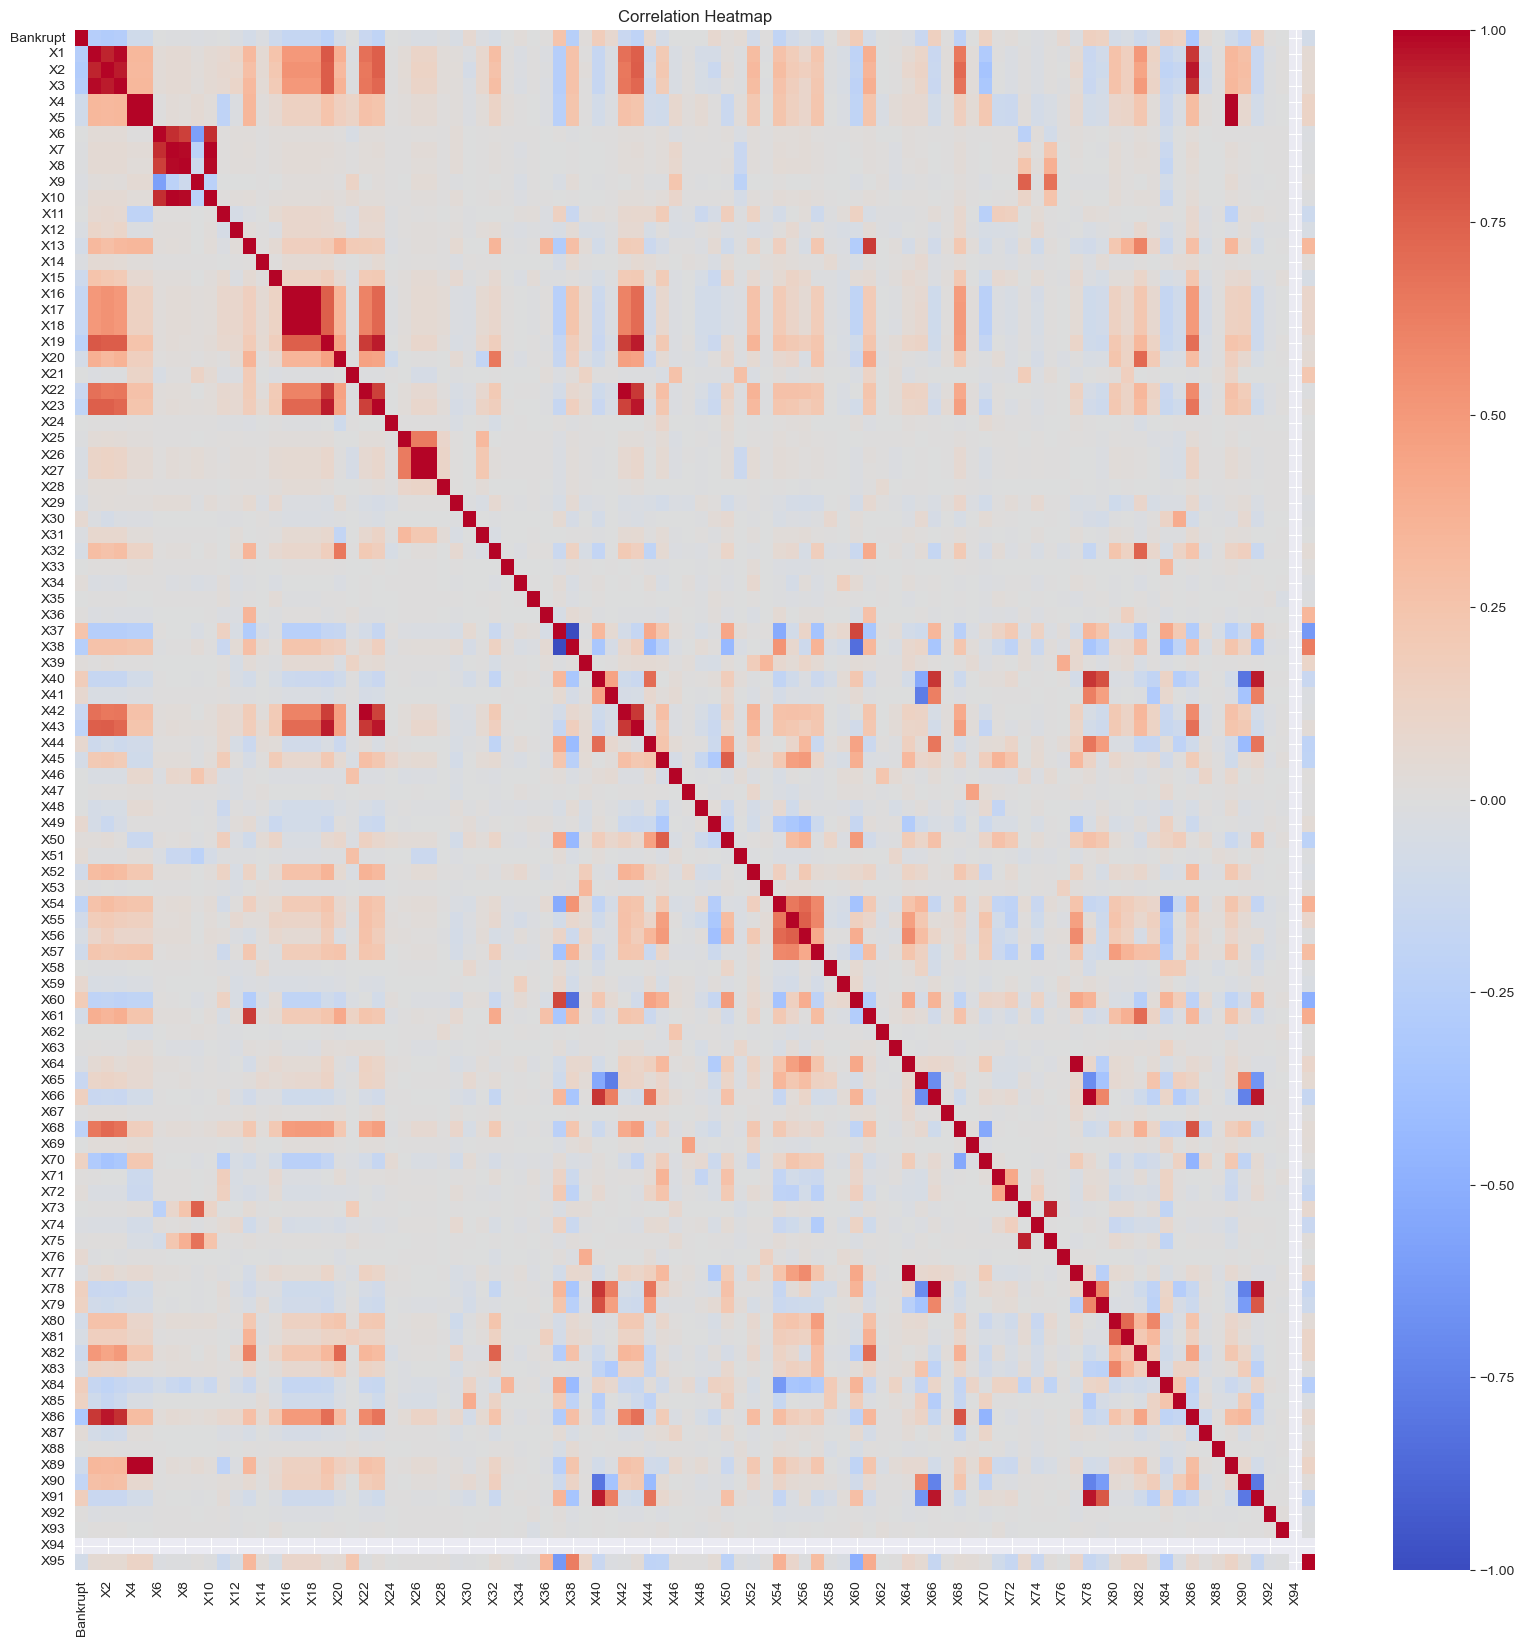

In [92]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [93]:
corr_pairs_df = extract_significant_correlations(corr_matrix, threshold=0.35)
print(corr_pairs_df)


    Variable 1 Variable 2  Correlation
0           X1         X2     0.940124
1           X1         X3     0.986849
2           X1        X16     0.505580
3           X1        X17     0.505407
4           X1        X18     0.505281
..         ...        ...          ...
182        X78        X91     0.963908
183        X79        X91     0.778135
184        X80        X81     0.712655
185        X80        X83     0.589998
186        X82        X86     0.440095

[187 rows x 3 columns]


In [94]:
to_remove_unique = corr_pairs_df['Variable 2'].unique()
print(f"Unique Features to Remove: {to_remove_unique}, Total: {len(to_remove_unique)}")

Unique Features to Remove: ['X2' 'X3' 'X16' 'X17' 'X18' 'X19' 'X20' 'X22' 'X23' 'X42' 'X43' 'X61'
 'X68' 'X82' 'X86' 'X5' 'X89' 'X7' 'X8' 'X10' 'X75' 'X73' 'X81' 'X52'
 'X32' 'X26' 'X27' 'X85' 'X44' 'X50' 'X60' 'X84' 'X54' 'X57' 'X95' 'X76'
 'X41' 'X66' 'X78' 'X79' 'X91' 'X55' 'X56' 'X71' 'X69' 'X64' 'X77' 'X80'
 'X90' 'X72' 'X83'], Total: 51


In [95]:
new_columns = df_cleaned.columns.drop(to_remove_unique)
df_reduced = df_cleaned[new_columns]

In [96]:
df_without_outliers = remove_outliers(df_reduced, ['X1', 'X37', 'X38', 'X45', 'X70', 'X65'])
df_without_outliers.describe()


Index(['Bankrupt', 'X1', 'X4', 'X6', 'X9', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X21', 'X24', 'X25', 'X28', 'X29', 'X30', 'X31', 'X33', 'X34', 'X35',
       'X36', 'X37', 'X38', 'X39', 'X40', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X51', 'X53', 'X58', 'X59', 'X62', 'X63', 'X65', 'X67', 'X70', 'X74',
       'X87', 'X88', 'X92', 'X93', 'X94'],
      dtype='object')


,Bankrupt,X1,X4,X6,X9,X11,X12,X13,X14,X15,...,X63,X65,X67,X70,X74,X87,X88,X92,X93,X94
count,5656.000000,5656.000000,5656.000000,5656.000000,5656.000000,5.656000e+03,5.656000e+03,5656.000000,5.656000e+03,5656.000000,...,5.656000e+03,5656.000000,5.656000e+03,5656.000000,5.656000e+03,5.656000e+03,5656.000000,5656.000000,5656.000000,5656.0
mean,0.020863,0.506477,0.607461,0.998809,0.303744,2.039872e+09,2.060338e+09,0.467800,1.579809e+07,0.117713,...,4.803352e+07,0.735864,5.854250e+07,0.023572,2.528471e+09,3.212518e+06,0.623956,0.027627,0.565294,1.0
std,0.142938,0.042991,0.015792,0.013312,0.011500,3.304620e+09,2.623795e+09,0.017016,1.056999e+08,0.138674,...,5.415280e+08,0.003202,6.010086e+08,0.013192,2.983665e+09,1.709195e+08,0.013342,0.017061,0.014222,0.0
min,0.000000,0.388047,0.000000,0.000000,0.062507,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.726675,0.000000e+00,0.000000,0.000000e+00,1.068158e-04,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.479355,0.600908,0.998975,0.303473,1.507611e-04,1.315837e-04,0.461876,2.090209e-04,0.000000,...,3.258725e-03,0.733581,0.000000e+00,0.013604,2.539164e-04,9.987180e-04,0.623622,0.026791,0.565158,1.0
50%,0.000000,0.503217,0.606048,0.999027,0.303529,2.441086e-04,6.960000e+08,0.465323,3.200320e-04,0.082599,...,6.562756e-03,0.735793,2.394520e-03,0.020833,1.135000e+09,2.269369e-03,0.623893,0.026816,0.565285,1.0
75%,0.000000,0.533040,0.613010,0.999096,0.303597,4.380000e+09,3.650000e+09,0.471022,5.250525e-04,0.204904,...,1.109862e-02,0.738056,9.658403e-03,0.031162,4.650000e+09,5.675085e-03,0.624201,0.026927,0.565778,1.0
max,1.000000,0.623653,1.000000,1.000000,1.000000,9.990000e+09,9.980000e+09,1.000000,9.900000e+08,1.000000,...,9.910000e+09,0.744784,9.540000e+09,0.062617,1.000000e+10,9.390000e+09,1.000000,1.000000,1.000000,1.0


In [97]:
bankrupt = df_without_outliers[df_without_outliers['Bankrupt'] == 1]
not_bankrupt = df_without_outliers[df_without_outliers['Bankrupt'] == 0]
mean_bankrupt = bankrupt.mean(numeric_only=True)
mean_not_bankrupt = not_bankrupt.mean(numeric_only=True)
mean_diff = mean_bankrupt - mean_not_bankrupt
print("Mean differences between groups:\n", mean_diff)


Mean differences between groups:
 Bankrupt    1.000000e+00
X1         -4.850821e-02
X4         -6.966060e-03
X6          5.388553e-05
X9         -4.461288e-04
X11         1.078610e+08
X12        -5.865202e+08
X13        -5.759268e-03
X14        -1.613471e+07
X15        -7.351511e-02
X21        -1.635970e+06
X24         4.140352e-04
X25        -1.300321e-04
X28        -6.384445e-04
X29        -5.741520e+08
X30        -2.772009e-04
X31        -3.128342e-04
X33        -4.965692e+05
X34        -8.647526e+06
X35         1.865293e-04
X36         2.459548e+07
X37         6.334837e-02
X38        -6.334837e-02
X39         5.465763e-03
X40         8.536187e-03
X45        -3.259774e-02
X46        -1.069357e+07
X47        -6.098644e+06
X48         9.384213e+07
X49         1.342306e+09
X51        -1.590827e+06
X53         1.987556e+07
X58        -3.062477e+06
X59         2.641833e+08
X62        -1.103456e-04
X63        -4.905699e+07
X65        -2.012959e-03
X67         7.961401e+05
X70         5.38

In [98]:
import pandas as pd
from scipy.stats import ttest_ind

numeric_cols = df_without_outliers.select_dtypes(include=['number']).columns[1:]

p_values = {}

for col in numeric_cols:
    t_stat, p_value = ttest_ind(bankrupt[col], not_bankrupt[col], nan_policy='omit')
    p_values[col] = p_value

p_values_df = pd.DataFrame(list(p_values.items()), columns=['Feature', 'p_value'])
p_values_df = p_values_df.sort_values(by='p_value', ascending=True)
p_values_df['p_value'] = p_values_df['p_value'].apply(lambda x: round(x, 4))
significant_features_df = p_values_df[p_values_df['p_value'] < 0.05]

print("Statistically Significant Features (p < 0.05):")
print(significant_features_df)

print("\nAll Features Sorted by p-value:")
print(p_values_df)


Statistically Significant Features (p < 0.05):
   Feature  p_value
23     X40   0.0000
21     X38   0.0000
20     X37   0.0000
0       X1   0.0000
35     X65   0.0000
8      X15   0.0000
28     X49   0.0000
32     X59   0.0000
24     X45   0.0000
1       X4   0.0000
6      X13   0.0003
5      X12   0.0163
13     X29   0.0263
22     X39   0.0394
10     X24   0.0450

All Features Sorted by p-value:
   Feature  p_value
23     X40   0.0000
21     X38   0.0000
20     X37   0.0000
0       X1   0.0000
35     X65   0.0000
8      X15   0.0000
28     X49   0.0000
32     X59   0.0000
24     X45   0.0000
1       X4   0.0000
6      X13   0.0003
5      X12   0.0163
13     X29   0.0263
22     X39   0.0394
10     X24   0.0450
7      X14   0.1008
38     X74   0.1431
19     X36   0.1528
41     X92   0.2323
34     X63   0.3302
30     X53   0.4502
12     X28   0.5336
25     X46   0.6404
37     X70   0.6607
3       X9   0.6767
17     X34   0.6974
40     X88   0.7047
4      X11   0.7257
15     X31   0.7478


C:\Users\aneta\anaconda3\envs\Bankruptcy-Prediction\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [99]:
non_significant_features = p_values_df[p_values_df['p_value'] >= 0.05]

print("Cechy do usunięcia (p >= 0.05):")
print(non_significant_features)

df_cleaned = df_without_outliers.drop(columns=non_significant_features['Feature'])

print("\nDataFrame po usunięciu nieistotnych cech:")
print(df_cleaned.head())


Cechy do usunięcia (p >= 0.05):
   Feature  p_value
7      X14   0.1008
38     X74   0.1431
19     X36   0.1528
41     X92   0.2323
34     X63   0.3302
30     X53   0.4502
12     X28   0.5336
25     X46   0.6404
37     X70   0.6607
3       X9   0.6767
17     X34   0.6974
40     X88   0.7047
4      X11   0.7257
15     X31   0.7478
9      X21   0.7568
27     X48   0.7601
26     X47   0.7607
14     X30   0.8247
39     X87   0.8366
31     X58   0.8366
18     X35   0.8639
16     X33   0.8840
29     X51   0.8840
11     X25   0.9026
33     X62   0.9176
2       X6   0.9653
36     X67   0.9886
42     X93   0.9977

DataFrame po usunięciu nieistotnych cech:
   Bankrupt        X1        X4         X12       X13       X15       X24  \
1         1  0.464291  0.610235         0.0  0.461867  0.000000  0.022080   
2         1  0.426071  0.601450  25500000.0  0.458521  0.000000  0.022760   
3         1  0.399844  0.583541         0.0  0.465705  0.000000  0.022046   
4         1  0.465022  0.598783      

In [100]:
significant_features = p_values_df[p_values_df['p_value'] < 0.05]

print("Cechy istotne statystycznie (p < 0.05):")
print(significant_features)


print("\nNazwy cech istotnych statystycznie:")
print(significant_features['Feature'].tolist())


Cechy istotne statystycznie (p < 0.05):
   Feature  p_value
23     X40   0.0000
21     X38   0.0000
20     X37   0.0000
0       X1   0.0000
35     X65   0.0000
8      X15   0.0000
28     X49   0.0000
32     X59   0.0000
24     X45   0.0000
1       X4   0.0000
6      X13   0.0003
5      X12   0.0163
13     X29   0.0263
22     X39   0.0394
10     X24   0.0450

Nazwy cech istotnych statystycznie:
['X40', 'X38', 'X37', 'X1', 'X65', 'X15', 'X49', 'X59', 'X45', 'X4', 'X13', 'X12', 'X29', 'X39', 'X24']


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_cleaned.drop(columns='Bankrupt')
y = df_cleaned['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu: {accuracy:.4f}")

print("Macierz pomyłek:\n", confusion_matrix(y_test, y_pred))

print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))


Dokładność modelu: 0.9776
Macierz pomyłek:
 [[1657    1]
 [  37    2]]
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1658
           1       0.67      0.05      0.10        39

    accuracy                           0.98      1697
   macro avg       0.82      0.53      0.54      1697
weighted avg       0.97      0.98      0.97      1697



In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_cleaned.drop(columns='Bankrupt')
y = df_cleaned['Bankrupt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)
lgbm_model.fit(X_train_scaled, y_train)

y_pred = lgbm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu LightGBM: {accuracy:.4f}")
print("\nMacierz pomyłek:\n", confusion_matrix(y_test, y_pred))
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 79, number of negative: 3880
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3776
[LightGBM] [Info] Number of data points in the train set: 3959, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.019955 -> initscore=-3.894143
[LightGBM] [Info] Start training from score -3.894143
Dokładność modelu LightGBM: 0.9817

Macierz pomyłek:
 [[1656    2]
 [  29   10]]

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1658
           1       0.83      0.26      0.39        39

    accuracy                           0.98      1697
   macro avg       0.91      0.63      0.69      1697
weighted avg       0.98      0.98      0.98      1697



In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_cleaned.drop(columns='Bankrupt')
y = df_cleaned['Bankrupt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu XGBoost: {accuracy:.4f}")

print("\nMacierz pomyłek:\n", confusion_matrix(y_test, y_pred))

print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))


Dokładność modelu XGBoost: 0.9788

Macierz pomyłek:
 [[1657    1]
 [  35    4]]

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1658
           1       0.80      0.10      0.18        39

    accuracy                           0.98      1697
   macro avg       0.89      0.55      0.59      1697
weighted avg       0.98      0.98      0.97      1697

